# **Activity 1: 2D - Gaussian**

Import Libs:

In [43]:
%matplotlib inline
from scipy.stats import multivariate_normal
import numpy as np
import pylab as plt

Probability density function evaluated

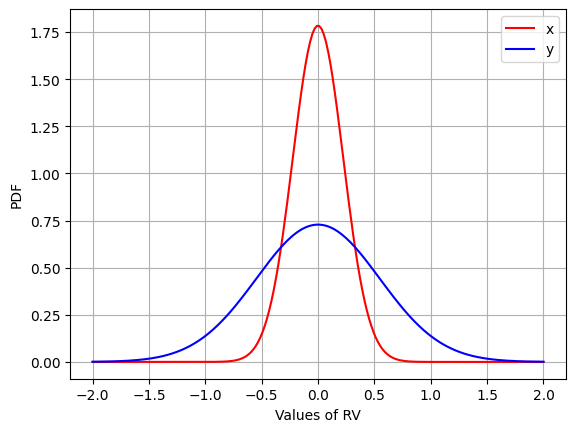

In [44]:
rv_x = multivariate_normal(mean=0.0, cov=0.05) #mu_x =0.0, \sigma_x = 0.2 
rv_y= multivariate_normal(mean=0.0, cov=0.3) #mu_y = 0.0, \sigma_y = 0.3
x = np.linspace (-2.0, 2.0, 200) 
pdf_x = rv_x.pdf(x) 
pdf_y=rv_y.pdf(x) #pdf(x) : Probability density function evaluated at x
plt.plot(x, pdf_x, '-', c='r', label='x')
plt.plot(x, pdf_y, '-', c='b', label='y') 
plt.xlabel('Values of RV')
plt.ylabel('PDF')
plt.grid() 
plt.legend()

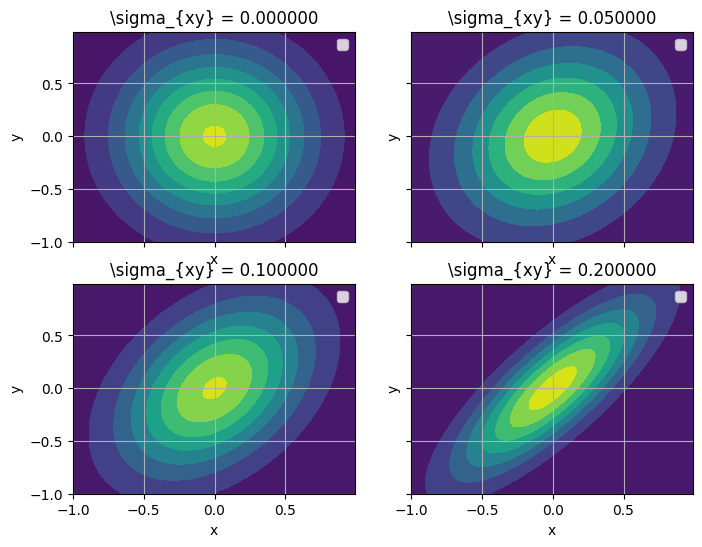

In [45]:
rv_xy = multivariate_normal (mean =[0.0, 0.0], cov=[[0.2, 0.15], [0.15, 0.3]]) 
x, y = np.mgrid [-1.0:1.0:.01, -1.0:1.0:.01]
pos= np.empty (x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
fig, axes =plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6)) 
for i, sigma_xy in enumerate([0.00, 0.05, 0.10, 0.2]):
  ax = axes.flat[i]
  rv_xy= multivariate_normal (mean =[0.0, 0.0], cov=[[0.2, sigma_xy], [sigma_xy, 0.3]]) 
  label = (r"\sigma_{xy} = %f" % sigma_xy)
  ax.contourf(x, y, rv_xy.pdf (pos))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()
  ax.set_title(label=label)
  ax.grid(True)

# **Activity 2: 2D - Gaussian Naive Bayes**

### **1. Demo**

Import Libs:

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd

Create data, normalize data:

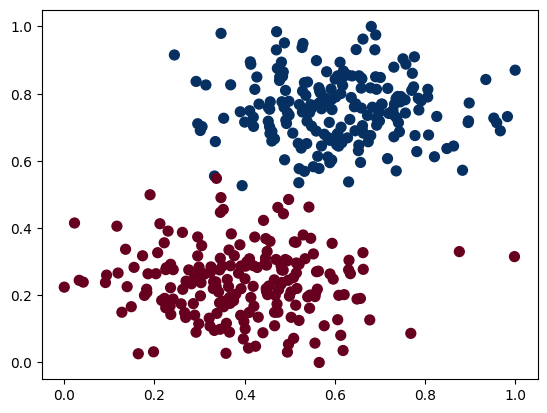

In [47]:
X, y = make_blobs (400, 2, centers = 2, random_state = 2, cluster_std = 1.5)
X_min = X.min(axis = 0, keepdims = True)
X_max = X.max(axis = 0, keepdims = True)
X = (X-X_min)/(X_max-X_min)
plt.scatter(X[:,0],X[:,1], c = y, s = 50, cmap = 'RdBu')

Visualize by Gaussian:

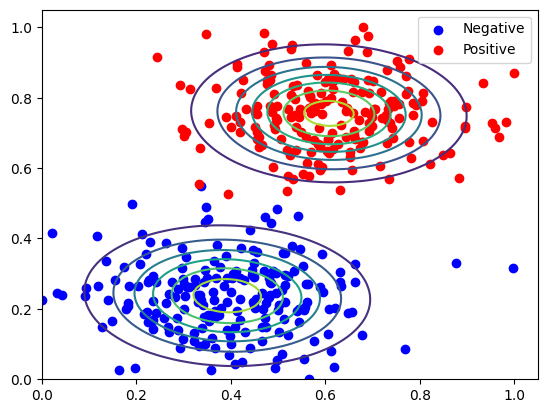

In [48]:
from scipy.stats import multivariate_normal
def visualize_by_gaussian (X, y):
# The distribution of first class
  X1 = X[y==0, :]
  sigma1 = np.cov(X1.T)
  mu1 = X1.mean (axis=0)
  g1 = multivariate_normal (mu1, sigma1)
  # The distribution of second class
  X2 = X[y==1, :]
  sigma2 = np.cov(X2.T)
  mu2 = X2.mean (axis=0)
  g2 = multivariate_normal(mu2, sigma2)
  # Visualize the distribution 
  a, b = np.mgrid[0:1:0.01, 0:1:0.01] 
  pos = np.dstack((a,b))
  plt.contour (a, b, g1.pdf(pos))
  plt.scatter (X1[:,0],X1[:,1],c='b', label = 'Negative') 
  plt.legend()
  plt.contour(a, b, g2.pdf (pos))
  plt.scatter (X2[:,0],X2[:,1],c='r', label = 'Positive') 
  plt.legend()
visualize_by_gaussian(X, y)

### **2. Using with data Social Network**

Load data

In [49]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Export Input, Output

In [50]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,-1].values
print(X.shape, y.shape)

(400, 2) (400,)


Normalize data and Visualize by Gausian

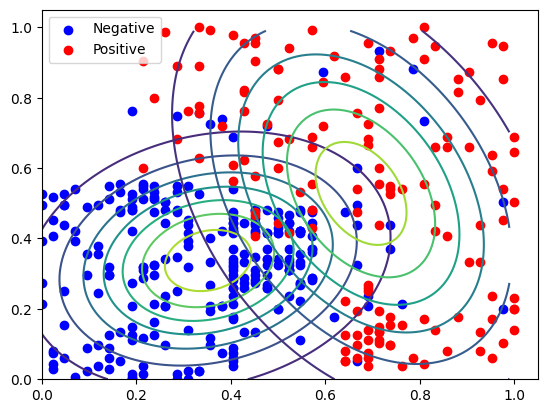

In [51]:
X_min = X.min(axis = 0, keepdims = True) 
X_max = X.max(axis = 0, keepdims = True)
X_scaled = (X-X_min)/(X_max-X_min)
visualize_by_gaussian(X_scaled , y)

Create Function Prediction():

In [57]:
def prediction(X,g1,g2): 
  X = np.array(X)
  score = np.log(g2.pdf(X)) - np.log(g1.pdf(X)) 
  y = np.zeros((X.shape[0],X.shape[1]))
  y[score>0] = 1 
  return y

Create Function Boundary_plot and visualize with boundary

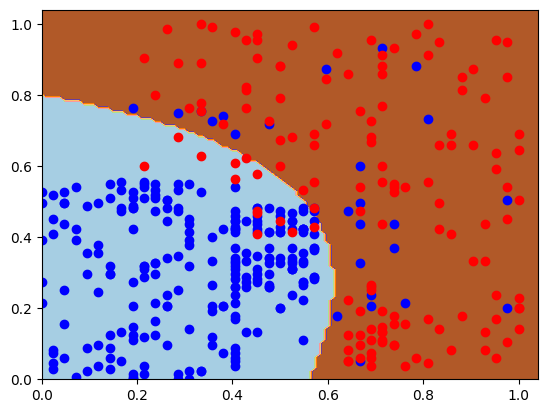

In [71]:
def boundary_plot(X, y):
  # The distribution of first class
  X1 = X[y==0, :]
  sigma1 = np.cov(X1.T)
  mu1 = X1.mean(axis=0)
  g1 = multivariate_normal(mu1, sigma1)
  # The distribution of second class
  X2 = X[y==1, :]
  sigma2 = np.cov(X2.T)
  mu2 = X2.mean(axis=0)
  g2= multivariate_normal(mu2, sigma2)
  # Visualize the distribution
  a, b = np.mgrid[0:1.05:0.01, 0:1.05:0.01]  
  pos = np.dstack((a,b))
  plt.contourf(a, b, prediction(pos, g1, g2), cmap='Paired') 
  # plt.contourf (a, b, g1.pdf(pos), cmap = 'Paired') 
  plt.scatter(X1[:, 0], X1[:, 1], c='b')
  plt.scatter(X2[:, 0], X2[:, 1], c='r')
  # plt.contourf (a, b, g2.pdf (pos), cmap = 'Paired') 
  plt.show()
boundary_plot(X_scaled, y)

Create Function visualize_boundary and using with data (Input, Output)

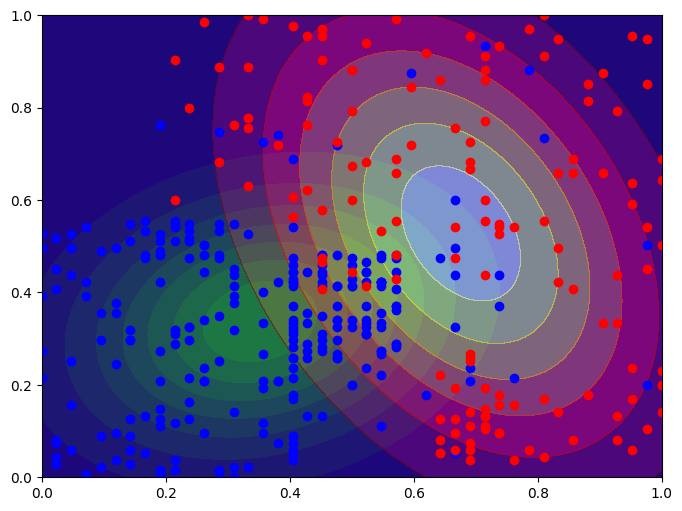

In [73]:
def visualize_boundary(X, y):
  # The distribution of first class
  X1 = X[y==0, :]
  sigma1 = np.cov(X1.T)
  mu1 = X1.mean (axis=0)
  g1 = multivariate_normal(mu1, sigma1)
  # The distribution of second class 
  X2 = X[y==1, :]
  sigma2 = np.cov(X2.T) 
  mu2 = X2.mean (axis=0)
  g2 = multivariate_normal(mu2, sigma2)
  # Visualize the distribution
  a, b = np.mgrid[0:1.01:0.01, 0:1.01:0.01] 
  pos = np.dstack((a,b))
  # Create a figure
  fig, ax = plt.subplots (figsize=(8, 6))
  # Plot the first contourf plot
  c1 = ax.contourf(a, b, g1.pdf (pos), cmap = 'winter')
  c2 = ax.contourf (a, b, g2.pdf (pos), cmap='hot', alpha = 0.5) 
  plt.scatter (X1[:,0],X1[:,1], c = 'b')
  plt.scatter (X2[:,0],X2[:,1], c ='r')
  plt.show()
visualize_boundary (X_scaled, y)